In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sodapy import Socrata
from datetime import datetime
import geojson
import requests

In [9]:
Household_income = pd.read_csv('/Users/turbold/Documents/CUSP/PUI/sfpermittimes/Data/ACS_2019_Household_income.csv', header=1)
Household_income.head()

,Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars),Margin of Error!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars),id,Geographic Area Name
0,103466,10635,1500000US060750101001,"Block Group 1, Census Tract 101, San Francisco..."
1,32087,15754,1500000US060750101002,"Block Group 2, Census Tract 101, San Francisco..."
2,166630,67576,1500000US060750102001,"Block Group 1, Census Tract 102, San Francisco..."
3,144358,33434,1500000US060750102002,"Block Group 2, Census Tract 102, San Francisco..."
4,152692,19092,1500000US060750102003,"Block Group 3, Census Tract 102, San Francisco..."


In [33]:
Census_block_group = gpd.read_file('file:///Users/turbold/Downloads/__San_Francisco_Bay_Region_2010_Census_Block_Groups.geojson')

In [38]:
Census_block_group.head()

,objectid,fipst,fipco,tractn,blkgrpn,blkgrpid,bgname,Shape__Area,Shape__Length,geometry
0,1,06,001,400100,1,060014001001,Block Group 1,0.000706,0.144231,"POLYGON ((-122.24692 37.88544, -122.24667 37.8..."
1,2,06,001,400200,1,060014002001,Block Group 1,0.000029,0.031774,"POLYGON ((-122.25508 37.84607, -122.25424 37.8..."
2,3,06,001,400200,2,060014002002,Block Group 2,0.000031,0.033831,"POLYGON ((-122.25792 37.84261, -122.25773 37.8..."
3,4,06,001,400300,1,060014003001,Block Group 1,0.000027,0.025534,"POLYGON ((-122.25186 37.84475, -122.25178 37.8..."
4,5,06,001,400300,2,060014003002,Block Group 2,0.000028,0.036617,"POLYGON ((-122.26230 37.83786, -122.26229 37.8..."


In [56]:
Household_income['blkgrpid'] = Household_income['id'].apply(lambda x: x[9:])

In [82]:
Household_income_merge = Census_block_group.merge(Household_income, how='inner')
Household_income_merge

,objectid,fipst,fipco,tractn,blkgrpn,blkgrpid,bgname,Shape__Area,Shape__Length,geometry,Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars),Margin of Error!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars),id,Geographic Area Name
0,1966,06,075,010100,1,060750101001,Block Group 1,0.000123,0.053583,"POLYGON ((-122.42108 37.81289, -122.42018 37.8...",103466,10635,1500000US060750101001,"Block Group 1, Census Tract 101, San Francisco..."
1,1967,06,075,010100,2,060750101002,Block Group 2,0.000022,0.028353,"POLYGON ((-122.41689 37.80521, -122.41524 37.8...",32087,15754,1500000US060750101002,"Block Group 2, Census Tract 101, San Francisco..."
2,1968,06,075,010200,1,060750102001,Block Group 1,0.000057,0.038006,"POLYGON ((-122.42663 37.80974, -122.42653 37.8...",166630,67576,1500000US060750102001,"Block Group 1, Census Tract 102, San Francisco..."
3,1969,06,075,010200,2,060750102002,Block Group 2,0.000013,0.019144,"POLYGON ((-122.42484 37.80227, -122.42465 37.8...",144358,33434,1500000US060750102002,"Block Group 2, Census Tract 102, San Francisco..."
4,1970,06,075,010200,3,060750102003,Block Group 3,0.000013,0.019144,"POLYGON ((-122.42661 37.80815, -122.42651 37.8...",152692,19092,1500000US060750102003,"Block Group 3, Census Tract 102, San Francisco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2543,06,075,980501,1,060759805011,Block Group 1,0.000162,0.071783,"POLYGON ((-122.42719 37.71575, -122.42685 37.7...",12340,6367,1500000US060759805011,"Block Group 1, Census Tract 9805.01, San Franc..."
582,2544,06,075,980600,1,060759806001,Block Group 1,0.000424,0.099441,"POLYGON ((-122.38694 37.72424, -122.38693 37.7...",66042,31556,1500000US060759806001,"Block Group 1, Census Tract 9806, San Francisc..."
583,2545,06,075,980900,1,060759809001,Block Group 1,0.000393,0.096807,"POLYGON ((-122.40695 37.74049, -122.40684 37.7...",-,**,1500000US060759809001,"Block Group 1, Census Tract 9809, San Francisc..."
584,2546,06,075,990100,0,060759901000,Block Group 0,0.007253,0.378299,"POLYGON ((-122.61228 37.81522, -122.58459 37.8...",-,**,1500000US060759901000,"Block Group 0, Census Tract 9901, San Francisc..."


In [87]:
Household_income_merge.shape

(586, 14)

In [93]:
Household_income_merge['Median household income'] = Household_income_merge['Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)'].str.extract('(\d+)', expand=False).astype(float)
Household_income_merge['Median household income'] = Household_income_merge['Median household income'].interpolate(method='linear')

<AxesSubplot:>

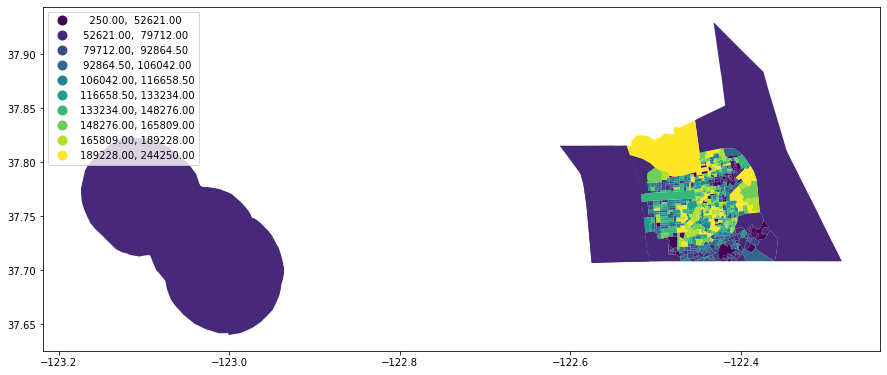

In [94]:
Household_income_merge['Median household income'] = pd.to_numeric(Household_income_merge['Median household income'])

fig, ax = plt.subplots(1, figsize=(15,15))

Household_income_merge.plot(ax=ax, column='Median household income', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

In [100]:
Household_income_merge=Household_income_merge.drop(columns=['objectid', 'fipst', 'fipco', 'tractn', 'blkgrpn', 'blkgrpid', 'bgname',
       'Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)',
       'Margin of Error!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)',
       'id'])

In [102]:
Household_income_merge.to_file("Block Group Median Household Income.geojson", driver='GeoJSON')